### Zipf (1949)

In [1]:
def zipf_1949(n, scale, **kwargs):
    '''
    11 March 2020
    generates and returns a scaled list of Zipf (1949) distribution rank-
    frequency pairs of length n, e.g., zipf_distrib(4, 1000) returns:
    [(1, 1000), (2, 500), (3, 333), (4, 250)]
    '''
    x_values = [x for x in range(1, n + 1)]
    if 'slope' in kwargs:
        slope = kwargs['slope']
        y_values = [round((1 / pow(x, -slope)) * scale) for x in x_values]
    else:
        y_values = [round((1 / x) * scale) for x in x_values]
    rank_frequency_pairs = list(zip(x_values, y_values))
    return rank_frequency_pairs

zipf_1949(4, 1000)

In [2]:
import matplotlib.pyplot as pp

def plot_data_scatter(data_points):
    x_values, y_values = zip(*data_points)
    pp.scatter(x_values, y_values)
    pp.xlabel('$log_{e}$ rank')
    pp.ylabel('$log_{e}$ frequency')

In [3]:
import math

def logify(data_points):
    x_tmp, y_tmp = zip(*data_points)
    x_values = list(x_tmp)
    y_values = list(y_tmp)
    x_log = [math.log(x) for x in x_values]
    y_log = [math.log(y) for y in y_values]
    return list(zip(x_log, y_log))

In [4]:
import statistics

def regression_slope(data_points):
    n = len(data_points)
    x_values, y_values = zip(*data_points)
    x_bar = statistics.mean(x_values)
    y_bar = statistics.mean(y_values)
    xy_sum = 0
    x_squared_sum = 0
    for i in range(n):
        xy_sum += x_values[i] * y_values[i]
        x_squared_sum += x_values[i] ** 2
    return (xy_sum - n * x_bar * y_bar) / (x_squared_sum - n * x_bar ** 2)

In [5]:
def plot_regression(data_points):
    x_values, y_values = zip(*data_points)
    x_bar = statistics.mean(x_values)
    y_bar = statistics.mean(y_values)
    slope = regression_slope(data_points)
    x_values = [0, max(x_values)]
    y_values = []
    for x in x_values:
        y_values.append(y_bar + slope * (x - x_bar))
    pp.plot(x_values, y_values)
    return slope

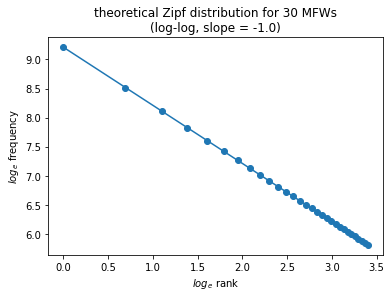

In [6]:
theoretical = zipf_1949(30, 10000)
n = len(theoretical)
plot_data_scatter(logify(theoretical[0:n]))
slope = plot_regression(logify(theoretical[0:n]))
pp.title(f'theoretical Zipf distribution for {n} MFWs\n(log-log, slope = {slope:.1f})')
pp.show()
